# Analyzing E-commerce Sales using Python

In this work, we will analyze Amazon sales data using Python to answer some questions regarding our sales. We will try to answer the following questions:
1. Identify the 5 items with the highest revenue.
2. Identify the 5 categories with the highest revenue.
3. Identify the 5 cities with the highest revenue.
4. Identify the 5 states with the highest revenue.
5. Identify the top 5 payment methods by transaction amount.
6. Calculate the total return/refund percentage.
7. Identify 5 Items with the highest returns.
8. Visualize the monthly sales revenue.
9. Identify orders by time of day to optimize advertisement spends.
10. Visualize trends and volatility in the daily sales.
11. Checking the distribution of daily sales using Three Sigma Rule or the 68-95-99.7 Rule.


**Importing required dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

In [3]:
data = pd.read_csv('Sales data.csv')
data.head()

,Order ID,Transaction Type,Order Date & Time,Quantity,Product,Category,Ship To City,Ship To State,Invoice Amount,Fulfillment Channel,Payment Method Code
0,10048,Shipment,01-01-2023 03:29,1,Item 25,Category 8,Faridabad,Haryana,1249.0,AFN,CC
1,10049,Shipment,01-01-2023 00:48,1,Item 9,Category 4,Faridabad,Haryana,939.0,AFN,COD
2,10050,Shipment,01-01-2023 00:34,1,Item 15,Category 6,Thane,Maharashtra,1149.0,AFN,PayStation
3,10051,Shipment,01-01-2023 00:34,1,Item 15,Category 6,Ernakulam,Kerala,1149.0,AFN,CC
4,10052,Shipment,01-01-2023 02:00,1,Item 15,Category 6,New Delhi,Delhi,1149.0,AFN,PayStation


**Converting our timestamp string data to datetime fromat**

In [4]:
data['Order Date & Time'] = pd.to_datetime(data['Order Date & Time'], format = '%d-%m-%Y %H:%M')

In [5]:
data.head()

,Order ID,Transaction Type,Order Date & Time,Quantity,Product,Category,Ship To City,Ship To State,Invoice Amount,Fulfillment Channel,Payment Method Code
0,10048,Shipment,2023-01-01 03:29:00,1,Item 25,Category 8,Faridabad,Haryana,1249.0,AFN,CC
1,10049,Shipment,2023-01-01 00:48:00,1,Item 9,Category 4,Faridabad,Haryana,939.0,AFN,COD
2,10050,Shipment,2023-01-01 00:34:00,1,Item 15,Category 6,Thane,Maharashtra,1149.0,AFN,PayStation
3,10051,Shipment,2023-01-01 00:34:00,1,Item 15,Category 6,Ernakulam,Kerala,1149.0,AFN,CC
4,10052,Shipment,2023-01-01 02:00:00,1,Item 15,Category 6,New Delhi,Delhi,1149.0,AFN,PayStation


**Getting information regarding our data**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75433 entries, 0 to 75432
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order ID             75433 non-null  int64         
 1   Transaction Type     75433 non-null  object        
 2   Order Date & Time    75433 non-null  datetime64[ns]
 3   Quantity             75433 non-null  int64         
 4   Product              75433 non-null  object        
 5   Category             75433 non-null  object        
 6   Ship To City         75433 non-null  object        
 7   Ship To State        75433 non-null  object        
 8   Invoice Amount       75433 non-null  float64       
 9   Fulfillment Channel  75433 non-null  object        
 10  Payment Method Code  75433 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 6.3+ MB


As seen above, our data has 11 columns with 75433 total entries and no null values

# Q1 - Identify the 5 items with the highest revenue

In [7]:
data[['Invoice Amount','Quantity']].groupby(data['Product']).sum().sort_values(by = 'Invoice Amount', ascending=False).head(5)


,Invoice Amount,Quantity
Product,,
Item 14,15106935.63,12130
Item 15,13390443.85,14786
Item 26,5136127.44,6308
Item 4,3720225.33,3656
Item 28,3024434.00,5546


# Q2 - Identify the 5 categories with the highest revenue

In [8]:
data[['Invoice Amount','Quantity']].groupby(data['Category']).sum().sort_values(by = 'Invoice Amount', ascending=False).head(5)

,Invoice Amount,Quantity
Category,,
Category 5,15106935.63,12130
Category 6,13477724.89,14855
Category 8,11603242.16,13611
Category 1,8794324.71,10917
Category 7,4002991.04,7431


# Q3 - Identify the 5 cities with the highest revenue

In [9]:
city_grp = data[['Invoice Amount', 'Quantity']].groupby([data['Ship To City'],data['Ship To State']])
city_grp.sum().sort_values(by = 'Invoice Amount', ascending=False).head(5)

,,Invoice Amount,Quantity
Ship To City,Ship To State,,
Bengaluru,Karnataka,8115371.03,9315
New Delhi,Delhi,4806377.08,5647
Hyderabad,Telangana,4083699.22,4973
Mumbai,Maharashtra,3667405.66,4168
Chennai,Tamil Nadu,2648672.87,3176


# Q4 - Identify the 5 states with the highest revenue

In [10]:
state_grp = data[['Invoice Amount', 'Quantity']].groupby(data['Ship To State'])
state_grp.sum().sort_values(by= 'Invoice Amount', ascending=False).head(5)


,Invoice Amount,Quantity
Ship To State,,
Maharashtra,10041395.48,11848
Karnataka,9822397.27,11274
Uttar Pradesh,5739387.61,7256
Delhi,5275652.51,6202
Tamil Nadu,5145137.83,6259


# Q5 - Identify the top 5 payment methods by transaction amount

In [11]:
payment_grp = data[['Invoice Amount','Quantity']].groupby(data['Payment Method Code'])
payment_grp.sum().sort_values(by = 'Invoice Amount', ascending=False).head(5)

,Invoice Amount,Quantity
Payment Method Code,,
COD,17713425.87,23747
PayStation,17702696.22,20194
CC,16513711.65,18246
GC_POA_PayStation,3622923.81,4141
CC_GC_POA,3455971.15,3939


# Q6 - Calculate the total return/refund percentage

In [12]:
transaction_grp = data['Invoice Amount'].groupby(data['Transaction Type'])
transaction_grp.sum()

Transaction Type
FreeReplacement           0.00
Refund             -8568491.69
Shipment           72229873.91
Name: Invoice Amount, dtype: float64

In [13]:
# Calculating the total refund percentage
refund_percent = abs(transaction_grp.sum()[1])/transaction_grp.sum()[2]*100
refund_percent

11.862808594511085

# Q7 - Identify 5 Items with the highest returns

In [14]:
refund_data = data[data['Transaction Type'] == 'Refund']
refund_data.head()

,Order ID,Transaction Type,Order Date & Time,Quantity,Product,Category,Ship To City,Ship To State,Invoice Amount,Fulfillment Channel,Payment Method Code
31,10079,Refund,2023-01-01 13:13:00,1,Item 26,Category 8,Guwahati,Assam,-1280.0,AFN,PayStation
83,10131,Refund,2023-01-02 13:21:00,1,Item 13,Category 4,Lucknow,Uttar Pradesh,-549.0,AFN,CC_GC_POA
84,10133,Refund,2023-01-02 13:40:00,1,Item 15,Category 6,Hyderabad,Telangana,-1149.0,AFN,GC_POA
140,10189,Refund,2023-01-02 15:18:00,1,Item 15,Category 6,Behror,Rajasthan,-1149.0,AFN,COD
214,10263,Refund,2023-01-04 02:26:00,1,Item 14,Category 5,Pimpri Chinchwad,Maharashtra,-3349.0,AFN,CC


In [15]:
refund_data['Quantity'].groupby(refund_data['Product']).sum().sort_values(ascending=False).head(8)

Product
Item 14    1778
Item 15    1231
Item 26     582
Item 28     460
Item 18     420
Item 2      290
Item 3      252
Item 4      246
Name: Quantity, dtype: int64

# Q8 - Identify the month with the highest revenue

In [16]:
# Creating a new month column
data['Order Month'] = data['Order Date & Time'].dt.month_name()
data.head()

,Order ID,Transaction Type,Order Date & Time,Quantity,Product,Category,Ship To City,Ship To State,Invoice Amount,Fulfillment Channel,Payment Method Code,Order Month
0,10048,Shipment,2023-01-01 03:29:00,1,Item 25,Category 8,Faridabad,Haryana,1249.0,AFN,CC,January
1,10049,Shipment,2023-01-01 00:48:00,1,Item 9,Category 4,Faridabad,Haryana,939.0,AFN,COD,January
2,10050,Shipment,2023-01-01 00:34:00,1,Item 15,Category 6,Thane,Maharashtra,1149.0,AFN,PayStation,January
3,10051,Shipment,2023-01-01 00:34:00,1,Item 15,Category 6,Ernakulam,Kerala,1149.0,AFN,CC,January
4,10052,Shipment,2023-01-01 02:00:00,1,Item 15,Category 6,New Delhi,Delhi,1149.0,AFN,PayStation,January


In [17]:
monthly_sales = data['Invoice Amount'].groupby(data['Order Month'])
monthly_sales.sum().sort_values(ascending = False)

Order Month
November     10765221.77
August        7958586.00
May           6287757.64
October       5988182.09
February      5463488.25
September     5399680.00
July          5055306.00
June          4787094.00
April         4260286.53
March         3945915.79
January       3749864.15
Name: Invoice Amount, dtype: float64

Text(0.5, 0, 'Month')

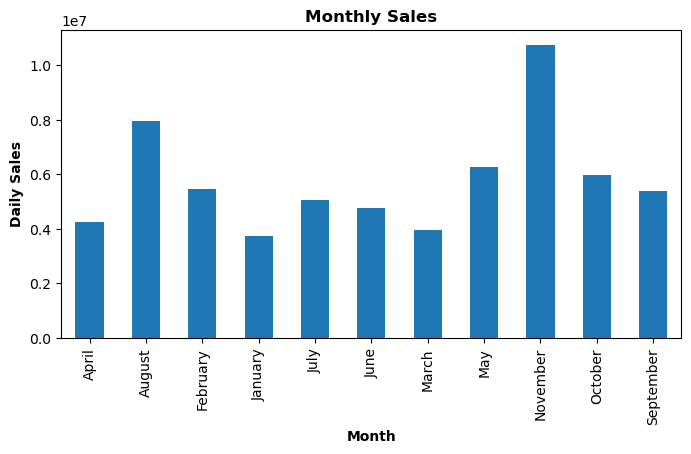

In [18]:
monthly_sales.sum().plot(kind='bar', figsize=(8,4))
plt.title('Monthly Sales', fontweight = 'bold')
plt.ylabel('Daily Sales', fontweight = 'bold')
plt.xlabel('Month', fontweight = 'bold')

# Q9 - Identify orders by time of day to optimize advertisement spends during that time

In [19]:
#data['Week of Month'] = data['Order Date & Time'].dt.week
data['Order Time (in h)'] = data['Order Date & Time'].dt.hour
data.head()

,Order ID,Transaction Type,Order Date & Time,Quantity,Product,Category,Ship To City,Ship To State,Invoice Amount,Fulfillment Channel,Payment Method Code,Order Month,Order Time (in h)
0,10048,Shipment,2023-01-01 03:29:00,1,Item 25,Category 8,Faridabad,Haryana,1249.0,AFN,CC,January,3
1,10049,Shipment,2023-01-01 00:48:00,1,Item 9,Category 4,Faridabad,Haryana,939.0,AFN,COD,January,0
2,10050,Shipment,2023-01-01 00:34:00,1,Item 15,Category 6,Thane,Maharashtra,1149.0,AFN,PayStation,January,0
3,10051,Shipment,2023-01-01 00:34:00,1,Item 15,Category 6,Ernakulam,Kerala,1149.0,AFN,CC,January,0
4,10052,Shipment,2023-01-01 02:00:00,1,Item 15,Category 6,New Delhi,Delhi,1149.0,AFN,PayStation,January,2


In [20]:
# Exclude refunds for counting orders not refunds
refund_excluded = data[data['Transaction Type']=='Shipment']
refund_excluded.head()

,Order ID,Transaction Type,Order Date & Time,Quantity,Product,Category,Ship To City,Ship To State,Invoice Amount,Fulfillment Channel,Payment Method Code,Order Month,Order Time (in h)
0,10048,Shipment,2023-01-01 03:29:00,1,Item 25,Category 8,Faridabad,Haryana,1249.0,AFN,CC,January,3
1,10049,Shipment,2023-01-01 00:48:00,1,Item 9,Category 4,Faridabad,Haryana,939.0,AFN,COD,January,0
2,10050,Shipment,2023-01-01 00:34:00,1,Item 15,Category 6,Thane,Maharashtra,1149.0,AFN,PayStation,January,0
3,10051,Shipment,2023-01-01 00:34:00,1,Item 15,Category 6,Ernakulam,Kerala,1149.0,AFN,CC,January,0
4,10052,Shipment,2023-01-01 02:00:00,1,Item 15,Category 6,New Delhi,Delhi,1149.0,AFN,PayStation,January,2


In [21]:
hourly_sales = refund_excluded['Quantity'].groupby(data['Order Time (in h)']).sum()
hourly_sales.head()

Order Time (in h)
0    3218
1    1895
2    1028
3     584
4     367
Name: Quantity, dtype: int64

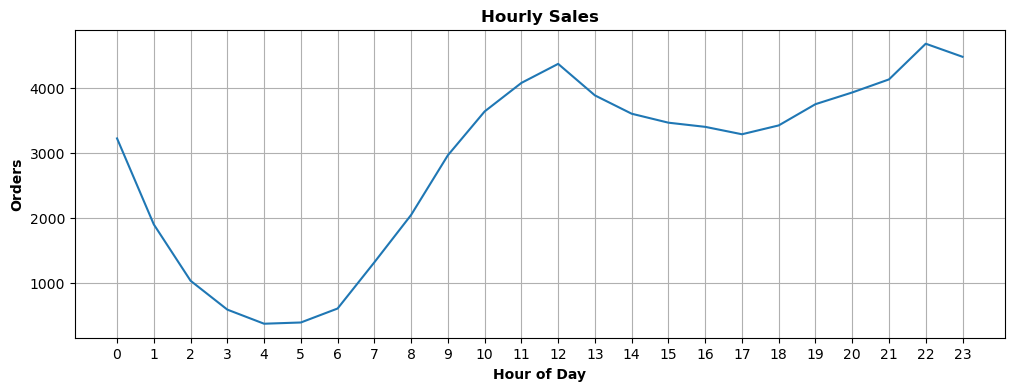

In [22]:
plt.figure(figsize = (12,4))
plt.plot(hourly_sales)
plt.xticks(hourly_sales.index)
plt.xlabel('Hour of Day', fontweight = 'bold')
plt.ylabel('Orders', fontweight = 'bold')
plt.title('Hourly Sales', fontweight = 'bold')
plt.grid()

# Q10. Visualizing trends and volatility in the daily sales.

We will visualize the trends and volatility in daily sales using mean and standard deviation. Volatility is based on the standard deviation, which changes as volatility increases and decreases. The analysis of trends and volatility will be done using 7 day moving average and upper & lower bounds. Upper and lower bounds will be calculated by adding and subtracting the standard deviation to/from the the 7 day moving average.

**Creating a new "Date" column to group data by daily date**

In [23]:
data['Date'] = data['Order Date & Time'].dt.date
data.head()

,Order ID,Transaction Type,Order Date & Time,Quantity,Product,Category,Ship To City,Ship To State,Invoice Amount,Fulfillment Channel,Payment Method Code,Order Month,Order Time (in h),Date
0,10048,Shipment,2023-01-01 03:29:00,1,Item 25,Category 8,Faridabad,Haryana,1249.0,AFN,CC,January,3,2023-01-01
1,10049,Shipment,2023-01-01 00:48:00,1,Item 9,Category 4,Faridabad,Haryana,939.0,AFN,COD,January,0,2023-01-01
2,10050,Shipment,2023-01-01 00:34:00,1,Item 15,Category 6,Thane,Maharashtra,1149.0,AFN,PayStation,January,0,2023-01-01
3,10051,Shipment,2023-01-01 00:34:00,1,Item 15,Category 6,Ernakulam,Kerala,1149.0,AFN,CC,January,0,2023-01-01
4,10052,Shipment,2023-01-01 02:00:00,1,Item 15,Category 6,New Delhi,Delhi,1149.0,AFN,PayStation,January,2,2023-01-01


**Grouping sales by daily dates**

In [24]:
daily_sales = data['Invoice Amount'].groupby(data['Date']).sum()
daily_sales.head()

Date
2023-01-01     82119.65
2023-01-02     76625.70
2023-01-03     94443.95
2023-01-04    106337.05
2023-01-05    104925.25
Name: Invoice Amount, dtype: float64

In [25]:
# Check for null values
daily_sales.info()

<class 'pandas.core.series.Series'>
Index: 334 entries, 2023-01-01 to 2023-11-30
Series name: Invoice Amount
Non-Null Count  Dtype  
--------------  -----  
334 non-null    float64
dtypes: float64(1)
memory usage: 5.2+ KB


**Creating a new trend dataframe to store the values**

In [26]:
trend_data = pd.DataFrame()
trend_data['Daily Sales'] = daily_sales
trend_data['Daily Sales 7 Day MA'] = daily_sales.rolling(window=7).mean()
trend_data['Upper'] = trend_data['Daily Sales 7 Day MA'] + 2*daily_sales.rolling(window=7).std()
trend_data['Lower'] = trend_data['Daily Sales 7 Day MA'] - 2*daily_sales.rolling(window=7).std()

#### Plotting and visualizing the trends and volatility for the last 3 months sales data

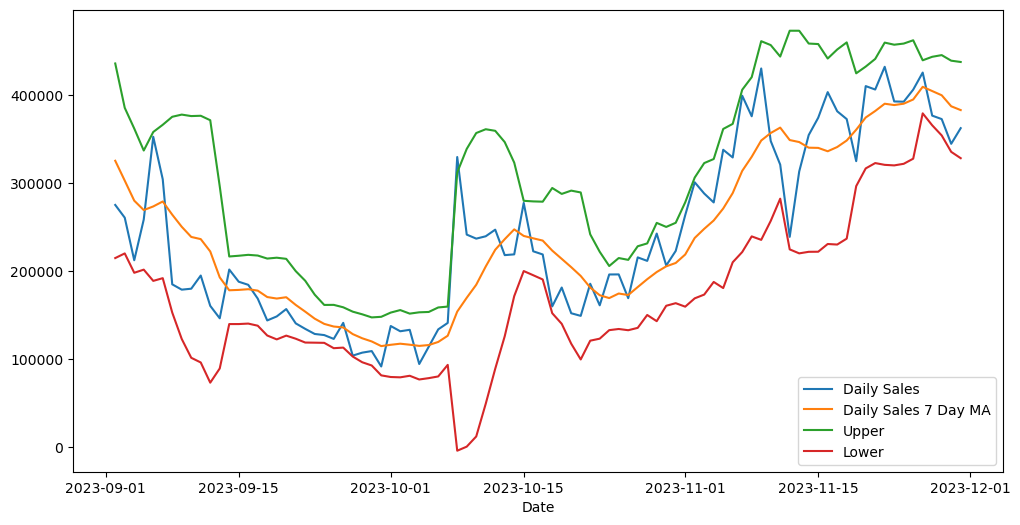

In [27]:
trend_data[['Daily Sales','Daily Sales 7 Day MA','Upper','Lower']].tail(90).plot(figsize=(12,6))
plt.legend()

In [28]:
#

# Q11 - Checking the distribution of daily sales using mean and standard deviation

For checking the distribution, we will use the empirical rule (also called Three Sigma Rule or the 68-95-99.7 Rule). The rule outlines the following insights for a normal distribution:
1. Approximately 68% of the data falls within one standard deviation from the mean
2. Around 95% of the data falls within two standard deviations from the mean
3. Almost 99.7% of the data falls within three standard deviations from the mean.

So, we will calcualte the percentage of points belonging in the above three groups and compare with the said percentages.

In [29]:
# Calculating mean of daily sales 
daily_sales.mean()

190602.94077844312

In [30]:
# Calculating standard deviation
deviation = daily_sales.std()
deviation

80659.77144027554

In [31]:
# Calculating the difference between daily sales and the mean daily sales
difference = abs(daily_sales - daily_sales.mean())
difference.head()

Date
2023-01-01    108483.290778
2023-01-02    113977.240778
2023-01-03     96158.990778
2023-01-04     84265.890778
2023-01-05     85677.690778
Name: Invoice Amount, dtype: float64

In [32]:
# Check for null values
difference.info()

<class 'pandas.core.series.Series'>
Index: 334 entries, 2023-01-01 to 2023-11-30
Series name: Invoice Amount
Non-Null Count  Dtype  
--------------  -----  
334 non-null    float64
dtypes: float64(1)
memory usage: 5.2+ KB


In [33]:
# Fnding points within one standard deviation
within_one_std = len(daily_sales[difference<deviation])/len(daily_sales)*100
within_one_std

75.1497005988024

In [34]:
# Fnding points within two standard deviation
within_two_std = len(daily_sales[difference<(2*deviation)])/len(daily_sales)*100
within_two_std

92.81437125748504

In [35]:
# Fnding points within three standard deviation
within_three_std = len(daily_sales[difference<(3*deviation)])/len(daily_sales)*100
within_three_std

100.0